<a href="https://colab.research.google.com/github/khanh22mse23057/Semester2-DIP/blob/main/%5BDigital_Image_and_Video_Processing%5D_Quiz_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

In [79]:

import cv2 
import urllib as URL
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv_imshow

import requests

from io import BytesIO
from PIL import Image
%matplotlib inline


### Some image helper functions

In [80]:
def im2double(imgPath):
   img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
   if img is not None:
      img = img.astype(np.float32) / 255.0 # Divide all values by the largest possible value in the datatype
   return img 

In [81]:
# Check Image Information
def image_infor(image):
  # Check the image matrix data type (could know the bit depth of the image)
  print(image.dtype)
  # Check the height of image 
  print(image.shape[0])
  # Check the width of image 
  print(image.shape[1])
  # Check the number of channels of the image
  print(image.shape[2])


#Q1: Read Image from Urls

> Read a color image from the Internet (i.e., nature.jpg). Display its red,
green and blue component separately.

In [82]:
def url_to_image(_url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = URL.request.urlopen(_url)
	image = np.asarray(bytearray(resp.read()), np.uint8)
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
	# return the image
	return image

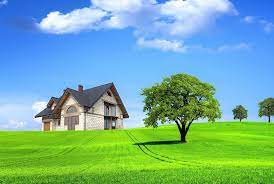

In [83]:

original_image = url_to_image("https://i.ibb.co/9WsDjNk/nature.jpg")
cv2_imshow(original_image)


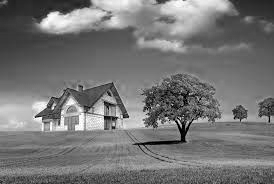

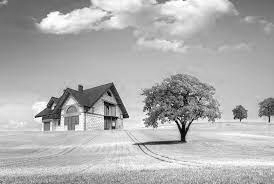

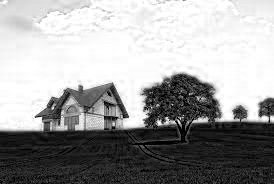

In [84]:
#Solution 1

# Get the shape of the image
height, width, channels = original_image.shape
# Split the image into 3 color channels:
# Red, Green and Blue
red_channel = np.zeros((height, width, 1), np.uint8)
green_channel = np.zeros((height, width, 1), np.uint8)
blue_channel = np.zeros((height, width, 1), np.uint8)

red_channel[:,:] = np.expand_dims(original_image[:,:,2], axis=2)
green_channel[:,:] = np.expand_dims(original_image[:,:,1], axis=2)
blue_channel[:,:] = np.expand_dims(original_image[:,:,0], axis=2)


# Solution 2
blue_channel, green_channel, red_channel = cv2.split(original_image)

# Display the red, green and blue channels
cv2_imshow(red_channel)
cv2_imshow(green_channel)
cv2_imshow(blue_channel)

# Q2: Swap the red and the blue component of the input image to create a new image (BGR), and save the new image into a new file.

Original and BGR Images


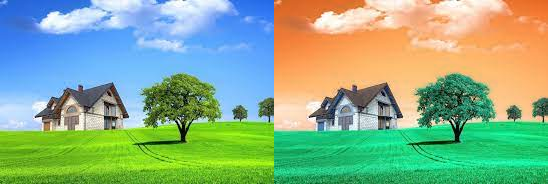

True

In [85]:
blue_channel, green_channel, red_channel = cv2.split(original_image)
# Create a new image with the red and blue channels swapped
bgr_image = cv2.merge([red_channel, green_channel, blue_channel])

# Display the original and new images side by side
combined_image = cv2.hconcat([original_image, bgr_image])
print('Original and BGR Images')
cv2_imshow(combined_image)

# Save images
cv2.imwrite('BGR_Image.jpg',bgr_image * 255)

#Q3: Try to make the image brighter or darker using add a constant or gamma correction.

**Code Python:**

Original, Brighter, and Gamma-Corrected Images


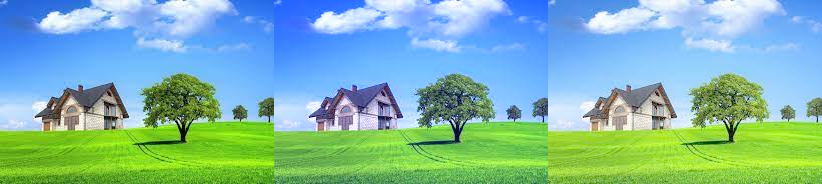

In [86]:
# Define the constant and gamma correction factors
brightness = 50  # positive value for brighter, negative value for darker
gamma = 1.5     # value greater than 1 for brighter, less than 1 for darker

# Add the constant to the image to make it brighter or darker
brighter_image = cv2.add(original_image, brightness)

# Apply gamma correction to the image to make it brighter or darker
gamma_correction = np.power(original_image / 255, 1/gamma) * 255
gamma_corrected_image = np.uint8(gamma_correction)

# Display the original, brighter, and gamma-corrected images side by side
combined_image = cv2.hconcat([original_image, brighter_image, gamma_corrected_image])
print('Original, Brighter, and Gamma-Corrected Images')
cv2_imshow(combined_image)


#Q4: Display the image and its histogram in color and grayscale.


Display the histogram of all the pixels in the color image

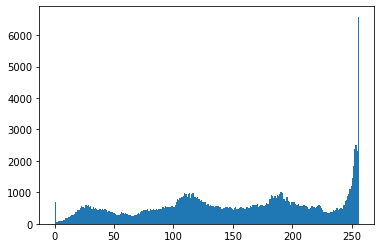

In [87]:
plt.hist(original_image.ravel(),bins = 256, range = [0,256]) 
plt.show()

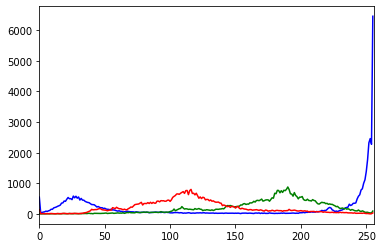

In [88]:
#Display the histogram of R, G, B channel We could observe that the green channel has many pixels in 255, which represents the white patch in the image
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([original_image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

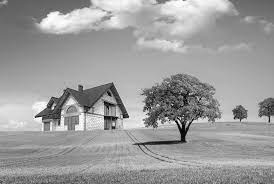

In [89]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

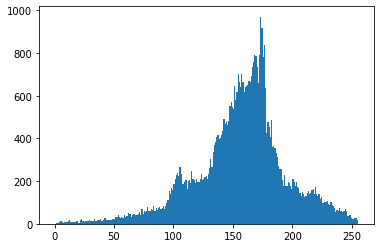

In [90]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

#Q5: With grayscale image, do three different actions
- flip left to right
- rotate clockwise 180 degrees
- crop ½ central of the image

Original Image


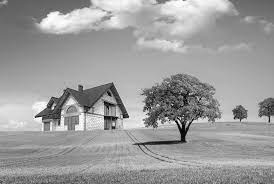

Flipped Left to Right


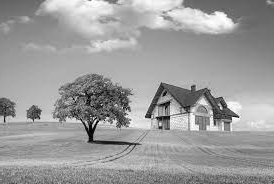

Rotated 180 Degrees


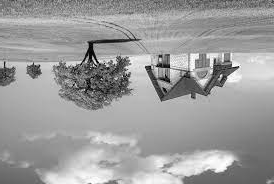

Cropped Image


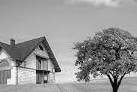

In [91]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Flip left to right
flipped_lr = cv2.flip(gray_image, 1)

# Rotate 180 degrees clockwise
rotated_180 = cv2.rotate(gray_image, cv2.ROTATE_180)

# Crop 1/2 central of the image
h, w = gray_image.shape
crop_y, crop_x = h//4, w//4
cropped = gray_image[crop_y:crop_y+h//2, crop_x:crop_x+w//2]


#result_images = cv2.hconcat([gray_image, flipped_lr, rotated_180])
# Display the results
print('Original Image')
cv2_imshow(gray_image)

print('Flipped Left to Right')
cv2_imshow(flipped_lr)
print('Rotated 180 Degrees')
cv2_imshow(rotated_180)

print('Cropped Image')
cv2_imshow(cropped)



#Q6 Quantize the grayscale using 2 bits, 4 bits, 6 bits and 8 bits. 
Visualize the effect of the operations.

2-bit Quantized


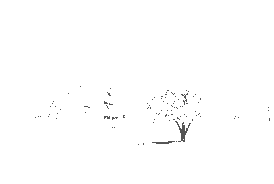

4-bit Quantized


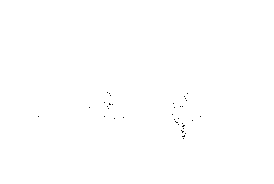

6-bit Quantized


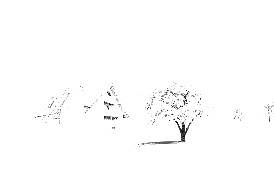

8-bit Quantized


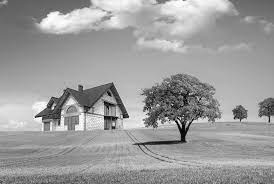

Original Image


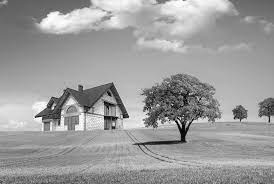

In [92]:

gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Define bit depths to quantize to
bit_depths = [2, 4, 6, 8]

# Loop over bit depths and quantize the image
for bits in bit_depths:
    # Calculate number of bins and bin size
    n_bins = 2 ** bits
    bin_size = 256 // n_bins
    
    # Calculate bin centers
    bin_centers = np.arange(0, 256, bin_size) + bin_size // 2
    
    # Quantize the image
    quantized = np.digitize(gray_image, bin_centers) * bin_size - 1
    
    # Convert to 8-bit grayscale for display
    quantized = cv2.convertScaleAbs(quantized, alpha=(255.0/(n_bins-1)))
    
    # Display the quantized image
    print(f'{bits}-bit Quantized')
    cv2_imshow(quantized)

# Display the original image
print('Original Image')
cv2_imshow(gray_image)


#Q7  Perform histogram equalization (global and local) for grayscale and color images. Display the original and equalized ones.

### Histogram Equalization
This section demonstrates histogram equalization on a dark image. This transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

In [93]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

In [94]:
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

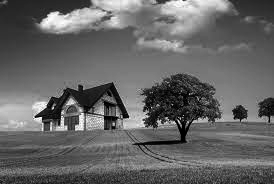

In [95]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

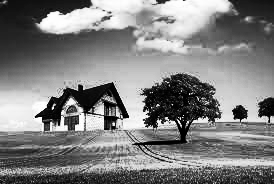

In [96]:
# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

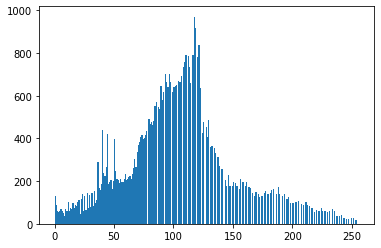

In [97]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

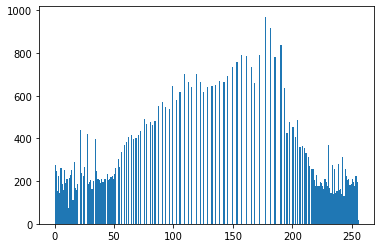

In [98]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

Solution 2:
Using opencv library **cv2.equalizeHist**

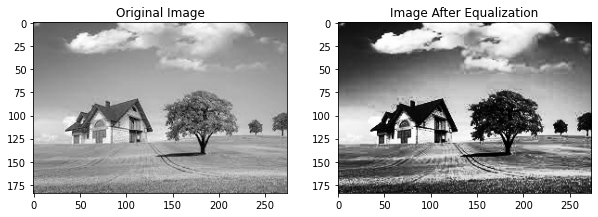

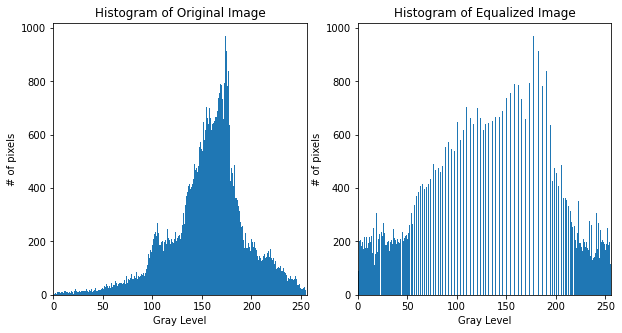

In [99]:
# Perform histogram equalization
eq_img = cv2.equalizeHist(gray_image)

# Show images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(gray_image, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(eq_img, cmap='gray')
axs[1].set_title('Image After Equalization')
plt.show()

# Show histograms of two images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(gray_image.ravel(), 256, [0, 256])
axs[0].set_xlim([0, 256])
axs[0].set_xlabel('Gray Level')
axs[0].set_ylabel('# of pixels')
axs[0].set_title('Histogram of Original Image')

axs[1].hist(eq_img.ravel(), 256, [0, 256])
axs[1].set_xlim([0, 256])
axs[1].set_xlabel('Gray Level')
axs[1].set_ylabel('# of pixels')
axs[1].set_title('Histogram of Equalized Image')

plt.show()

Original Color Image


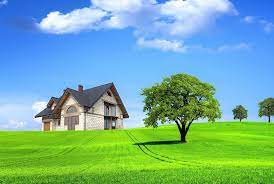

Global Histogram Equalization


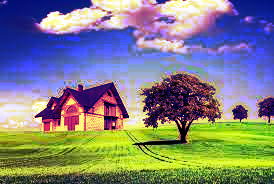

Local Histogram Equalization


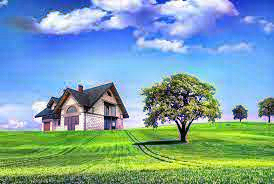

In [100]:
# Split the color image into its RGB channels
b, g, r = cv2.split(original_image)

# Apply global histogram equalization to each channel
global_eq_b = cv2.equalizeHist(b)
global_eq_g = cv2.equalizeHist(g)
global_eq_r = cv2.equalizeHist(r)

# Apply local histogram equalization to each channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
local_eq_b = clahe.apply(b)
local_eq_g = clahe.apply(g)
local_eq_r = clahe.apply(r)

# Merge the equalized channels to form the final color image
global_eq_color = cv2.merge((global_eq_b, global_eq_g, global_eq_r))
local_eq_color = cv2.merge((local_eq_b, local_eq_g, local_eq_r))

# Display the original and equalized images

print("Original Color Image")
cv2_imshow(original_image)
print("Global Histogram Equalization")
cv2_imshow(global_eq_color)
print("Local Histogram Equalization")
cv2_imshow(local_eq_color)